In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [151]:
class Lab3(object):
    def __init__(self, m, k1, k2, x, y, x1, y1, h, p, iterations=37):
        self._m = m
        self._h = h
        self._p = p
        self._k1 = k1
        self._k2 = k2
        
        self._x = x
        self._y = y
        
        self._start_x = x
        self._start_y = y
        
        self._start_x1 = x1
        self._start_y1 = y1
        
        self._x1 = x1
        self._y1 = y1
        
        self._x2 = 0.0
        self._y2 = 0.0
        
        self._plot_x = []
        self._plot_y = []
        
        self._iterations = iterations
        
        self._fig = plt.figure()
        self._fig.set_dpi(150)
        self._ax = plt.axes(xlim=(-7, 7), ylim=(-7, 7))
        self._ax.grid(True)
        self._plot_frame, = self._ax.plot([], [], lw=3) 
        
        
    
    def _setup_plot(self):
        self._plot_frame.set_data([], [])
        return self._plot_frame,
    
    def _setup_plot_second_case(self):
        self._ax.set_xlim(-3, 5)
        self._ax.set_ylim(-2, 3)
        self._plot_frame.set_data([], [])
        return self._plot_frame,
    
    def _calculate_first_state_point(self, i):
        self._x2 = -self._k1 * self._x / self._m
        self._y2 = -self._k2 * self._y / self._m
        
        self._x1 += self._h * self._x2
        self._y1 += self._h * self._y2
        
        self._x += self._h * self._x1
        self._y += self._h * self._y1
        
        self._plot_x.append(self._x)
        self._plot_y.append(self._y)
        
        self._plot_frame.set_data(self._plot_x, self._plot_y)
        return self._plot_frame,
    
    def _calculate_second_state_point(self, i):
        self._x2 = -self._k1 * self._x / self._m - self._p * self._x1
        self._y2 = -self._k2 * self._y / self._m - self._p * self._y1
        
        self._x1 += self._h * self._x2
        self._y1 += self._h * self._y2
        
        self._x += self._h * self._x1
        self._y += self._h * self._y1
        
        self._plot_x.append(self._x)
        self._plot_y.append(self._y)
        
        self._plot_frame.set_data(self._plot_x, self._plot_y)
        return self._plot_frame,
    
    def process_first_state(self):
        self._x = self._start_x
        self._y = self._start_y
        self._x1 = self._start_x1
        self._y1 = self._start_y1
        self._plot_x = [self._x]
        self._plot_y = [self._y]
        
        anim = animation.FuncAnimation(
            self._fig,
            self._calculate_first_state_point,
            frames=self._iterations,
            init_func=self._setup_plot,
            interval=100,
            blit=True
        )
        anim.save("plot_1.gif", writer="imagemagick")
    
    def process_second_state(self):
        self._x = self._start_x
        self._y = self._start_y
        self._x1 = self._start_x1
        self._y1 = self._start_y1
        self._plot_x = [self._x]
        self._plot_y = [self._y]
        
        anim = animation.FuncAnimation(
            self._fig,
            self._calculate_second_state_point,
            frames=self._iterations,
            init_func=self._setup_plot_second_case,
            interval=100,
            blit=True
        )
        anim.save("plot_2.gif", writer="imagemagick")
    
    def main(self):
        self.process_first_state()
        self.process_second_state()

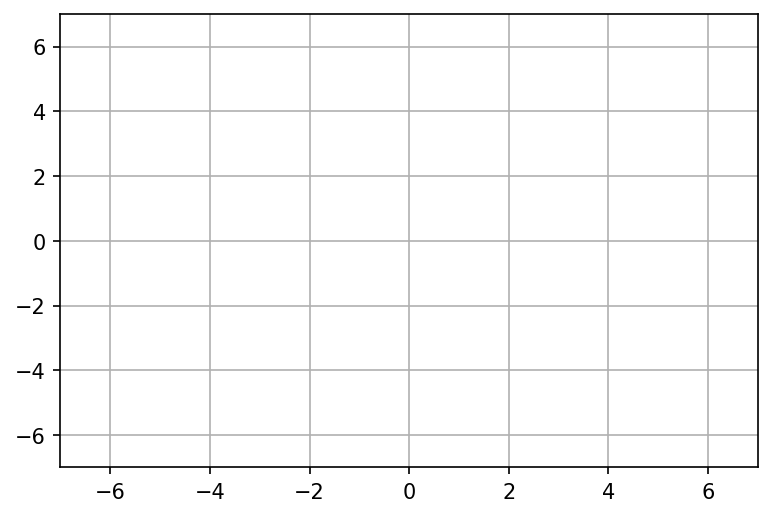

In [152]:
m = 5.0
k1 = 3.0
k2 = 3.0

x = 4.0
y = 0.0

x1 = 2.0
y1 = 3.0

h = 0.5
p = 0.3

lab3 = Lab3(m, k1, k2, x, y, x1, y1, h, p)

In [153]:
lab3.main()